In [30]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# Load the dataset
pg = pd.read_csv("penguins_size.csv")

In [60]:
# Display the first five rows of dataset
pg.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [88]:
# Print data types of DataFrame
pg.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [90]:
# Print info of DataFrame
pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [40]:
# Check the missing values
pg.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [92]:
# Print description of DataFrame
pg.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [62]:
# 5. Group by species and calculate mean values
species_mean = pg.groupby("species").mean(numeric_only=True)
print(species_mean)

           culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
species                                                                     
Adelie            38.791391        18.346358         189.953642  3700.662252
Chinstrap         48.833824        18.420588         195.823529  3733.088235
Gentoo            47.504878        14.982114         217.186992  5076.016260


In [66]:
# 6. Group by species and sex, then calculate mean values
species_sex_mean = pg.groupby(["species", "sex"]).mean(numeric_only=True)
print(species_sex_mean)

                  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
species   sex                                                            
Adelie    FEMALE         37.257534        17.621918         187.794521   
          MALE           40.390411        19.072603         192.410959   
Chinstrap FEMALE         46.573529        17.588235         191.735294   
          MALE           51.094118        19.252941         199.911765   
Gentoo    .              44.500000        15.700000         217.000000   
          FEMALE         45.563793        14.237931         212.706897   
          MALE           49.473770        15.718033         221.540984   

                  body_mass_g  
species   sex                  
Adelie    FEMALE  3368.835616  
          MALE    4043.493151  
Chinstrap FEMALE  3527.205882  
          MALE    3938.970588  
Gentoo    .       4875.000000  
          FEMALE  4679.741379  
          MALE    5484.836066  


In [68]:
# 7. Find which species has the highest average for each variable
winners = species_mean.idxmax()
max_values = species_mean.max()
result = pd.DataFrame({"Top Species": winners, "Average Value": max_values})
print(result)

                  Top Species  Average Value
culmen_length_mm    Chinstrap      48.833824
culmen_depth_mm     Chinstrap      18.420588
flipper_length_mm      Gentoo     217.186992
body_mass_g            Gentoo    5076.016260


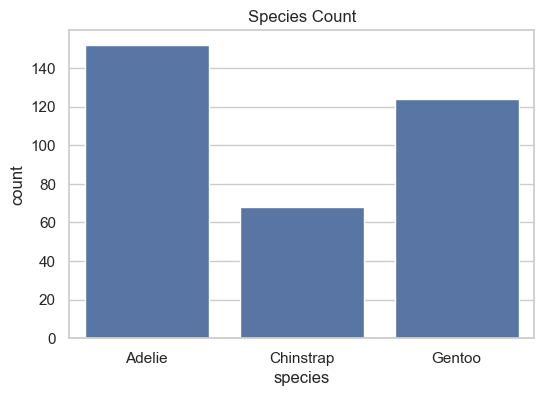

In [70]:
# Count plot of species
plt.figure(figsize=(6,4))
sns.countplot(data=pg, x="species")
plt.title("Species Count")
plt.show()

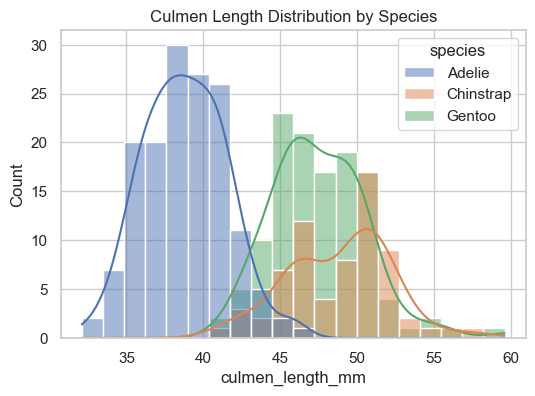

In [72]:
# Histogram of culmen length, separated by species
plt.figure(figsize=(6,4))
sns.histplot(data=pg, x="culmen_length_mm", hue="species", bins=20, kde=True)
plt.title("Culmen Length Distribution by Species")
plt.show()

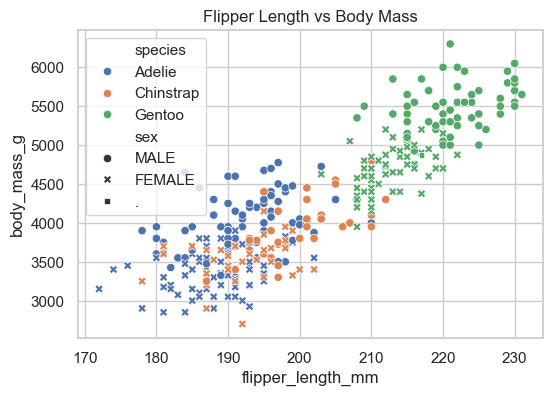

In [76]:
# Scatter plot: flipper length vs body mass, with species & sex
plt.figure(figsize=(6,4))
sns.scatterplot(data=pg, x="flipper_length_mm", y="body_mass_g", hue="species", style="sex")
plt.title("Flipper Length vs Body Mass")
plt.show()

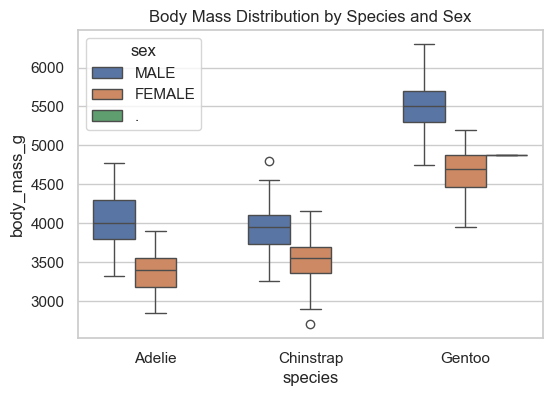

In [80]:
# Box plot of body mass by species and sex
plt.figure(figsize=(6,4))
sns.boxplot(data=pg, x="species", y="body_mass_g", hue="sex")
plt.title("Body Mass Distribution by Species and Sex")
plt.show()

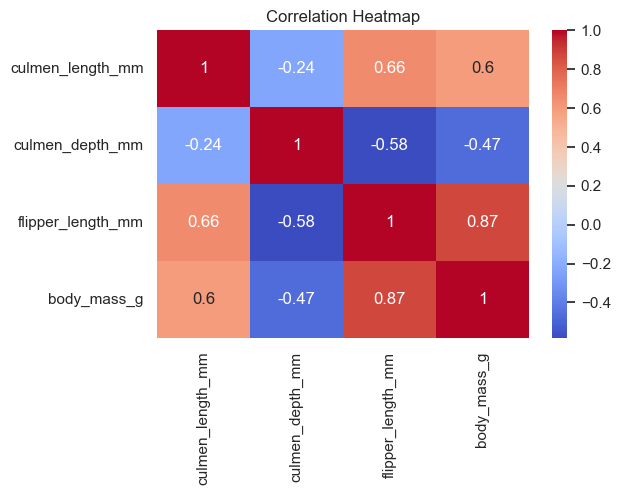

In [86]:
# Correlation heatmap of numeric variables
plt.figure(figsize=(6,4))
sns.heatmap(pg.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()